# DATA IMPORT AND PRE-PROCESSING

In [28]:
#%% import required packages
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import os
from plotnine import ggplot, aes, geom_boxplot, geom_jitter, theme_bw, theme, xlab, ylab, facet_wrap, ylim
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [2]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [3]:
#%% set directory
os.getcwd()
os.chdir('C:\\Users\\BIOL0050\\OneDrive - Nexus365\\0.7. Data sci\\MDPI Crops analysis\\')

In [4]:
#%% import data
data_full = pd.read_csv('220907 all data.csv')
data_full = pd.DataFrame(data_full)
data = data_full.iloc[:, 5:408]

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

#%% define predictor and response variables
X = data.iloc[:, 1:405].values
X = scaler.fit_transform(X)
y = data_full[["nutrient_treatment"]].values.ravel()
yvar = data_full[["cultivar"]].values.ravel()

# SULPHUR PREDICTION

In [6]:
# set up neural network model and investigate optimal parameters (for agronomic treatment prediction)
mlp = MLPClassifier(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(50), (100), (50,50), (100,100), (50, 50, 50), (100, 100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 1],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, y)

# Best parameter set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': 50, 'learning_rate': 'constant', 'solver': 'sgd'}


In [6]:
#%% model for predicting agronomic treatment
#define cross-validation method
cv = RepeatedKFold(n_splits = 5, n_repeats = 100)
# define models
model = GaussianNB()
model2 = MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50), learning_rate = 'constant', solver='sgd')

In [10]:
# evaluate models
scoring = {'bal_acc':'balanced_accuracy'}
scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs = -1)
scores2 = cross_validate(model2, X, y, scoring=scoring, cv=cv, n_jobs = -1)

In [12]:
# summarize result
print(np.mean(scores['test_bal_acc']))
print(np.mean(scores2['test_bal_acc']))

0.859064393939394
0.8894554112554113


In [13]:
#%% extract and combine model accuracy scores
gnbdf = pd.DataFrame(scores['test_bal_acc'])
gnbdf.columns = ['GNB']
nndf = pd.DataFrame(scores2['test_bal_acc'])
nndf.columns = ['NN']
fulldata = pd.concat([gnbdf, nndf], axis=1)

In [14]:
print(fulldata)

          GNB        NN
0    0.854167  0.888889
1    0.928571  0.850000
2    0.937500  0.875000
3    0.791667  1.000000
4    0.714286  1.000000
..        ...       ...
495  0.770833  1.000000
496  0.928571  0.791667
497  0.900000  0.916667
498  0.770833  0.937500
499  0.928571  0.875000

[500 rows x 2 columns]


In [15]:
#%% reshape data
fulldata2 = fulldata.melt(var_name = 'model', value_name = 'Accuracy')

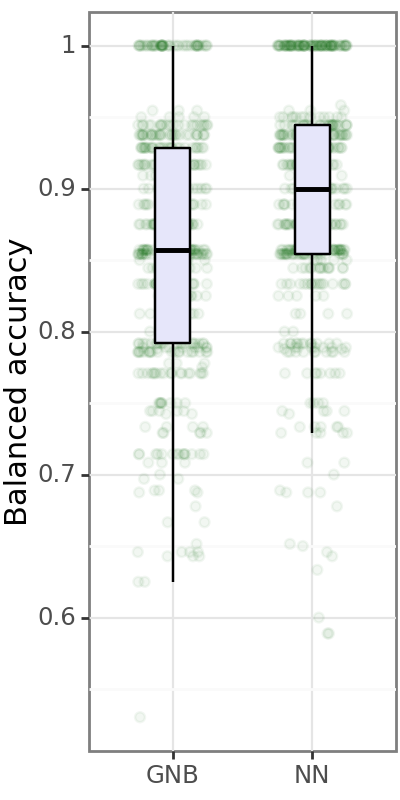

<Figure Size: (200 x 400)>

In [16]:
#%% plot accuracy scores
(ggplot(fulldata2, aes(x = 'model', y = 'Accuracy'))
 + geom_jitter(width = 0.25, alpha = 0.05, color = "darkgreen")
 + geom_boxplot(width = 0.25, color = "black", fill = "lavender", outlier_shape = 'x', outlier_colour = '') 
 + theme_bw()
 + theme(figure_size=(2, 4))
 + xlab("")
 + ylab("Balanced accuracy")
 )

# CULTIVAR PREDICTION

In [15]:
# set up neural network model and investigate optimal parameters (for cultivar prediction)
mlp = MLPClassifier(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(50), (100), (50,50), (100,100), (50, 50, 50), (100, 100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 1],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, yvar)

# Best parameter set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [17]:
#%% models for predicting cultivar
#define cross-validation method
cv = RepeatedKFold(n_splits = 5, n_repeats = 100)
# define models
varmodel = GaussianNB()
varmodel2 = MLPClassifier(activation='tanh', alpha=1, hidden_layer_sizes=(50,50), learning_rate = 'constant', solver='adam')
varmodel3 = KNeighborsClassifier()

In [18]:
# evaluate models
scoring = {'bal_acc':'balanced_accuracy'}
varscores = cross_validate(varmodel, X, yvar, scoring=scoring, cv=cv, n_jobs = -1)
varscores2 = cross_validate(varmodel2, X, yvar, scoring=scoring, cv=cv, n_jobs = -1)

In [20]:
# summarize result
print(np.mean(varscores['test_bal_acc']))
print(np.mean(varscores2['test_bal_acc']))

0.4037075396825397
0.7402875048100047


In [21]:
#%% extract and combine model accuracy scores
vargnbdf = pd.DataFrame(varscores['test_bal_acc'])
vargnbdf.columns = ['GNB']
varnndf = pd.DataFrame(varscores2['test_bal_acc'])
varnndf.columns = ['NN']
varfulldata = pd.concat([vargnbdf, varnndf], axis=1)

In [22]:
#%% reshape data
varfulldata2 = varfulldata.melt(var_name = 'model', value_name = 'Accuracy')

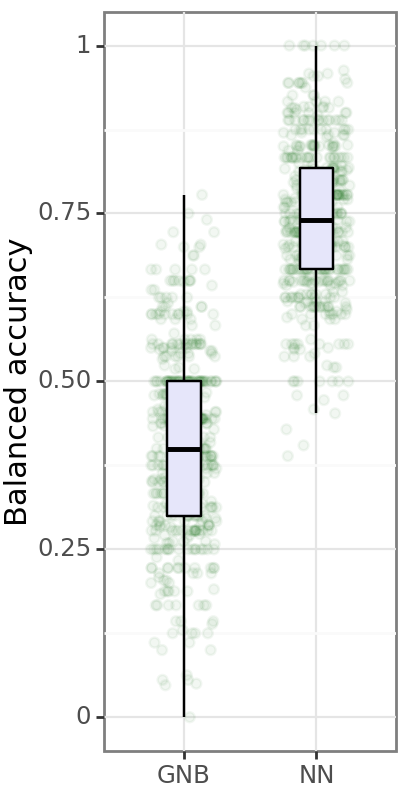

<Figure Size: (200 x 400)>

In [23]:
#%% plot accuracy scores
(ggplot(varfulldata2, aes(x = 'model', y = 'Accuracy'))
 + geom_jitter(width = 0.25, alpha = 0.05, color = "darkgreen")
 + geom_boxplot(width = 0.25, color = "black", fill = "lavender", outlier_shape = 'x', outlier_colour = '') 
 + theme_bw()
 + theme(figure_size=(2, 4))
 + xlab("")
 + ylab("Balanced accuracy")
 )

# PLOTTING TOGETHER

In [24]:
fulldata2['variable'] = "Sulphur treatment"
varfulldata2['variable'] = "Genotype"
completedata = pd.concat([fulldata2, varfulldata2])

In [25]:
print(completedata)

    model  Accuracy           variable
0     GNB  0.854167  Sulphur treatment
1     GNB  0.928571  Sulphur treatment
2     GNB  0.937500  Sulphur treatment
3     GNB  0.791667  Sulphur treatment
4     GNB  0.714286  Sulphur treatment
..    ...       ...                ...
995    NN  0.625000           Genotype
996    NN  0.666667           Genotype
997    NN  0.500000           Genotype
998    NN  0.777778           Genotype
999    NN  0.738095           Genotype

[2000 rows x 3 columns]


C:\Users\BIOL0050\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_jitter : Removed 1 rows containing missing values.


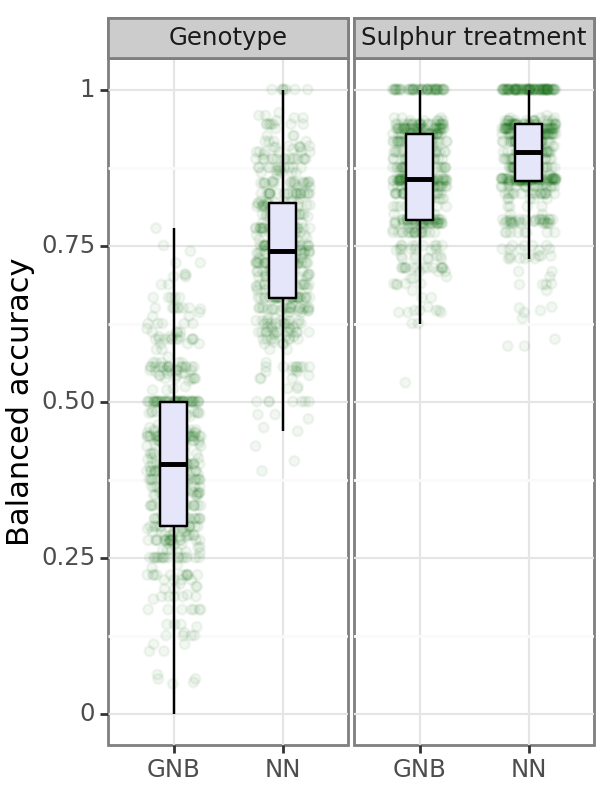

<Figure Size: (300 x 400)>

In [30]:
(ggplot(completedata, aes(x = 'model', y = 'Accuracy'))
 + geom_jitter(width = 0.25, alpha = 0.05, color = "darkgreen")
 + geom_boxplot(width = 0.25, color = "black", fill = "lavender", outlier_shape = 'x', outlier_colour = '') 
 + theme_bw()
 + facet_wrap('variable')
 + theme(figure_size=(3, 4))
 + xlab("")
 + ylab("Balanced accuracy")
 + ylim(0, 1)
 )